In [ ]:
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# loading the data into the dataframe
df = pd.read_csv('/content/Kolkata (1).csv')
print(df)

          From Date        To Date    PM10     NO2    CO  Ozone     RH   Temp
0     1/2/2019 0:00  2/2/2019 0:00  250.59  131.83  1.86  23.52  64.72  18.88
1     2/2/2019 0:00  3/2/2019 0:00  270.26  130.72  2.49  28.60  62.94  19.86
2     3/2/2019 0:00  4/2/2019 0:00  279.37  121.83  2.03  29.07  59.13   20.1
3     4/2/2019 0:00  5/2/2019 0:00  246.44  143.11  2.23  24.75  58.21  20.16
4     5/2/2019 0:00  6/2/2019 0:00  256.35  125.45  2.23  29.80  62.05   19.6
...             ...            ...     ...     ...   ...    ...    ...    ...
1866            NaN            NaN     NaN     NaN   NaN    NaN    NaN    NaN
1867            NaN            NaN     NaN     NaN   NaN    NaN    NaN    NaN
1868            NaN            NaN     NaN     NaN   NaN    NaN    NaN    NaN
1869            NaN            NaN     NaN     NaN   NaN    NaN    NaN    NaN
1870            NaN            NaN     NaN     NaN   NaN    NaN    NaN      S

[1871 rows x 8 columns]


In [ ]:
# viewing info about the columns
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1855 non-null   object 
 1   To Date    1855 non-null   object 
 2   PM10       1856 non-null   float64
 3   NO2        1856 non-null   float64
 4   CO         1856 non-null   float64
 5   Ozone      1856 non-null   float64
 6   RH         1856 non-null   float64
 7   Temp       1857 non-null   object 
dtypes: float64(5), object(3)
memory usage: 117.1+ KB


In [ ]:
#viewing few rows from the top
df.head()

,From Date,To Date,PM10,NO2,CO,Ozone,RH,Temp
0,1/2/2019 0:00,2/2/2019 0:00,250.59,131.83,1.86,23.52,64.72,18.88
1,2/2/2019 0:00,3/2/2019 0:00,270.26,130.72,2.49,28.60,62.94,19.86
2,3/2/2019 0:00,4/2/2019 0:00,279.37,121.83,2.03,29.07,59.13,20.1
3,4/2/2019 0:00,5/2/2019 0:00,246.44,143.11,2.23,24.75,58.21,20.16
4,5/2/2019 0:00,6/2/2019 0:00,256.35,125.45,2.23,29.80,62.05,19.6


In [ ]:
#number of rows and columns in the dataset
print(df.shape)

(1871, 8)


In [ ]:
#statistical information about columns
print(df.describe())

              PM10          NO2           CO        Ozone           RH
count  1856.000000  1856.000000  1856.000000  1856.000000  1856.000000
mean     99.081536    28.400356     0.850604    39.479687    78.785305
std      68.754437    26.903626     0.567563    15.246061    11.169311
min       6.800000     0.340000     0.070000     1.030000    33.280000
25%      41.642500     9.360000     0.390000    28.727500    72.435000
50%      73.205000    17.565000     0.740000    37.635000    79.445000
75%     151.350000    41.760000     1.160000    47.522500    86.757500
max     379.810000   200.870000     4.600000   108.730000    99.070000


In [ ]:
#checking how many null values are in each column
df.isnull().sum()

From Date    16
To Date      16
PM10         15
NO2          15
CO           15
Ozone        15
RH           15
Temp         14
dtype: int64

In [ ]:
# dropping all the rows with NaN values
df = df.dropna()

In [ ]:
#defining training and testing data
x_train = df[:1484]
y_train = x_train['Ozone']
x_test = df[1484:2966]
y_test = x_test['Ozone']
print(y_test)

1484    40.29
1485    35.83
1486    50.33
1487    27.79
1488    36.69
        ...  
1866      NaN
1867      NaN
1868      NaN
1869      NaN
1870      NaN
Name: Ozone, Length: 387, dtype: float64


In [ ]:
df.loc[1484:2966].count() / df.shape[0] * 100

From Date    20.0
To Date      20.0
PM10         20.0
NO2          20.0
CO           20.0
Ozone        20.0
RH           20.0
Temp         20.0
dtype: float64

In [ ]:
#Normalizing training data
train_norm = x_train['Ozone']

#converted into array as all the methods available are for arrays and not lists
train_norm_arr = np.asarray(train_norm)
train_norm = np.reshape(train_norm_arr, (-1, 1))

#Scaling all values between 0 and 1 so that large values don't just dominate
scaler = MinMaxScaler(feature_range=(0, 1))
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.2088208]
[0.25598886]
[0.26035283]
[0.22024141]
[0.26713092]


In [ ]:
count = 0
for i in range(len(train_norm)):
    if train_norm[i] == 0:
        count = count +1
print('Number of null values in train_norm = ', count)

Number of null values in train_norm =  0


In [ ]:
#removing null values
train_norm = train_norm[train_norm!=0]

In [ ]:
#Normalizing testing data and repeating the same process as done for training data
test_norm = x_test['Ozone']
test_norm_arr = np.asarray(test_norm)
test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.41105557]
[0.34548662]
[0.55865922]
[0.22728609]
[0.35812996]


In [ ]:
count = 0
for i in range(len(test_norm)):
    if test_norm[i] == 0:
        count = count + 1
print('Number of null values in test_norm = ', count)

Number of null values in test_norm =  1


In [ ]:
#removing null values
test_norm = test_norm[test_norm != 0]

In [ ]:
print(train_norm.shape)
print(test_norm.shape)

(1484, 1)
(387, 1)


In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [ ]:
n_steps = 3
X_split_train, y_split_train = split_sequence(train_norm, n_steps)
#for i in range(len(X_split_train)):
    #print(X_split_train[i], y_split_train[i])
n_features = 1
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))
for i in range(5):
    print(X_split_train)
    print(y_split_train)

[[[0.2088208 ]
  [0.25598886]
  [0.26035283]]

 [[0.25598886]
  [0.26035283]
  [0.22024141]]

 [[0.26035283]
  [0.22024141]
  [0.26713092]]

 ...

 [[0.12961931]
  [0.254039  ]
  [0.26527391]]

 [[0.254039  ]
  [0.26527391]
  [0.3178273 ]]

 [[0.26527391]
  [0.3178273 ]
  [0.38440111]]]
[[0.22024141]
 [0.26713092]
 [0.25283194]
 ...
 [0.3178273 ]
 [0.38440111]
 [0.34902507]]
[[[0.2088208 ]
  [0.25598886]
  [0.26035283]]

 [[0.25598886]
  [0.26035283]
  [0.22024141]]

 [[0.26035283]
  [0.22024141]
  [0.26713092]]

 ...

 [[0.12961931]
  [0.254039  ]
  [0.26527391]]

 [[0.254039  ]
  [0.26527391]
  [0.3178273 ]]

 [[0.26527391]
  [0.3178273 ]
  [0.38440111]]]
[[0.22024141]
 [0.26713092]
 [0.25283194]
 ...
 [0.3178273 ]
 [0.38440111]
 [0.34902507]]
[[[0.2088208 ]
  [0.25598886]
  [0.26035283]]

 [[0.25598886]
  [0.26035283]
  [0.22024141]]

 [[0.26035283]
  [0.22024141]
  [0.26713092]]

 ...

 [[0.12961931]
  [0.254039  ]
  [0.26527391]]

 [[0.254039  ]
  [0.26527391]
  [0.3178273 ]]

 [[

In [ ]:
X_split_test, y_split_test = split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

[[0.41105557]
 [0.34548662]
 [0.55865922]] [0.22728609]
[[0.34548662]
 [0.55865922]
 [0.22728609]] [0.35812996]
[[0.55865922]
 [0.22728609]
 [0.35812996]] [0.41972949]
[[0.22728609]
 [0.35812996]
 [0.41972949]] [0.26624522]
[[0.35812996]
 [0.41972949]
 [0.26624522]] [0.30961482]


In [ ]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

# Optimizers
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# For RMSprop, the following line is an example, but it's commented out since you're not using it in the final compilation
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile the model with the Adam optimizer
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])

# Now you can fit the model with your data
# model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

Epoch 1/10
47/47 [==============================] - 2s 12ms/step - loss: 0.0695 - accuracy: 6.7522e-04 - val_loss: nan - val_accuracy: 0.0052
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0106 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.0014 - val_loss: nan - val_accuracy: 0.0052
Epoch 8/10
47/47 [==================

In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
yhat = model.predict(X_split_test)
for i in range(5):
    print(yhat[i])

12/12 [==============================] - 0s 2ms/step
[0.43655434]
[0.35703933]
[0.35036922]
[0.36222228]
[0.344159]


In [ ]:
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE: %.5f' % rmse)
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_split_test, yhat)
print('MAPE: %.5f' % mape)
# R-squared (R²)
r2 = abs(r2_score(y_split_test, yhat))
print('R²: %.5f' % r2)
accuracy = 100 - mape
print('Accuracy: %.5f%%' % accuracy)

ValueError: Input contains NaN.

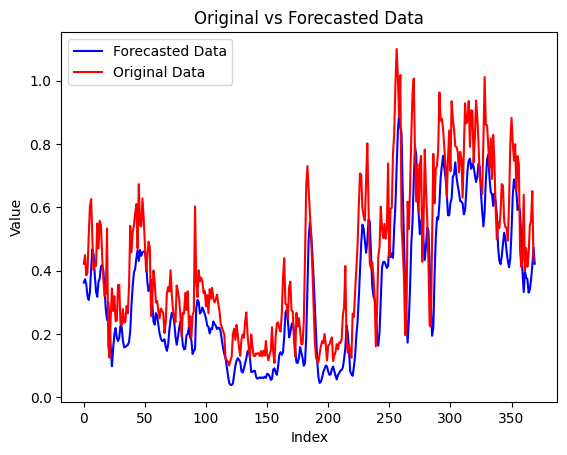

In [ ]:
# Plot forecasted data (yhat)
plt.plot(yhat, label='Forecasted Data', color='blue')

# Plot original data (y_split_test) with some vertical offset
plt.plot(y_split_test + 0.1, label='Original Data', color='red')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.title('Original vs Forecasted Data')
plt.show()

In [ ]:
_, train_acc = model.evaluate(X_split_train, y_split_train, verbose=0)
_, test_acc = model.evaluate(X_split_test, y_split_test, verbose=0)
print('Train: %.5f, Test: %.5f' % (train_acc, test_acc))

Train: 0.00135, Test: 0.00521


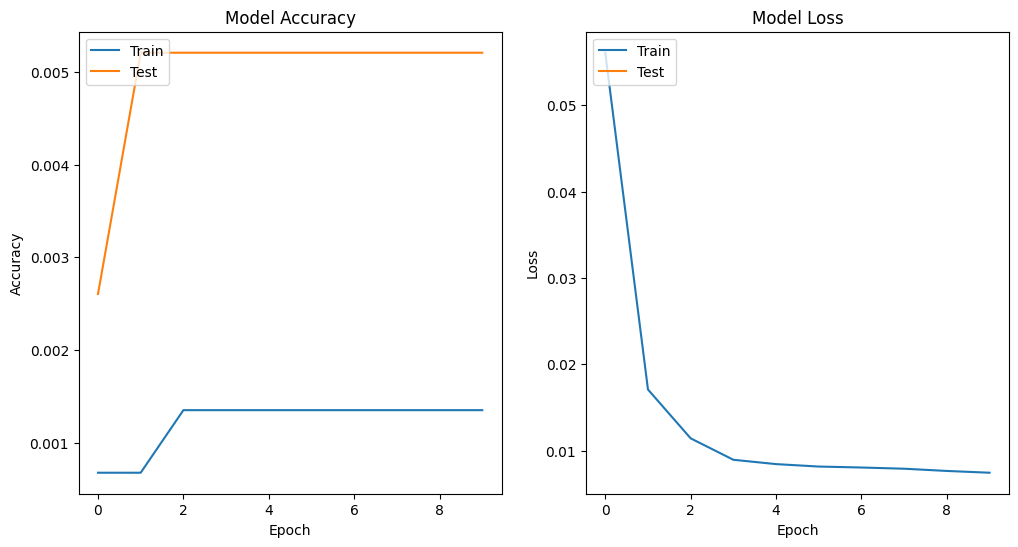

In [ ]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot model accuracy
ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot model loss
ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

# Display the plots
plt.show()

In [ ]:
def compute(var):
    train_norm = x_train[var]
    train_norm_arr = np.asarray(train_norm)
    train_norm = np.reshape(train_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_norm = scaler.fit_transform(train_norm)
    train_norm = train_norm[train_norm != 0]

    test_norm = x_test[var]
    test_norm_arr = np.asarray(test_norm)
    test_norm = np.reshape(test_norm_arr, (-1, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    test_norm = scaler.fit_transform(test_norm)
    test_norm = test_norm[test_norm != 0]

    X_split_train, y_split_train = split_sequence(train_norm, n_steps)
    X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

    X_split_test, y_split_test = split_sequence(test_norm, n_steps)
    X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))

    hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=10, verbose = 1)

    yhat = model.predict(X_split_test)
    mse = mean_squared_error(y_split_test, yhat)
    print(mse)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Epoch 1/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 6.7568e-04 - val_loss: 0.0173 - val_accuracy: 0.0027
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0095 - accuracy: 6.7568e-04 - val_loss: 0.0172 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 6.7568e-04 - val_loss: 0.0170 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 6.7568e-04 - val_loss: 0.0170 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 6.7568e-04 - val_loss: 0.0167 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 6.7568e-04 - val_loss: 0.0169 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 6.7568e-04 - val_loss: 0.0165 - val_accuracy:

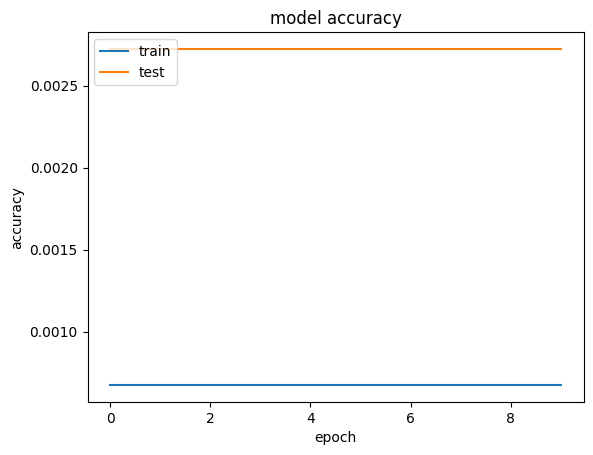

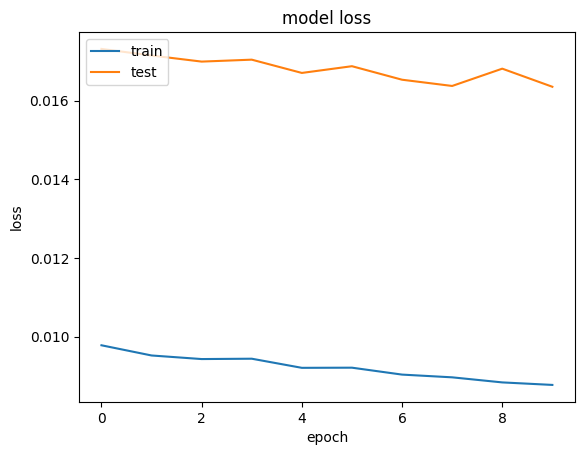

In [ ]:
compute('Ozone')

Epoch 1/10
47/47 [==============================] - 1s 15ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0027
Epoch 2/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0069 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accu

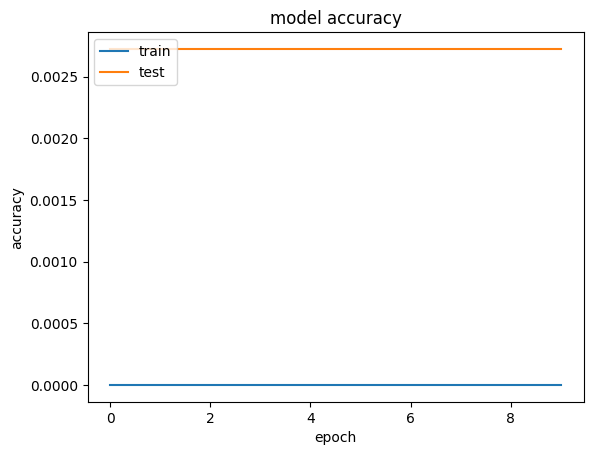

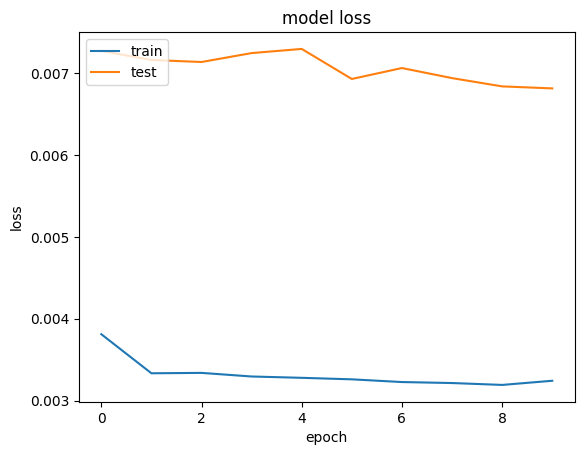

In [ ]:
compute('NO2')

Epoch 1/10
47/47 [==============================] - 1s 12ms/step - loss: 0.0037 - accuracy: 6.7568e-04 - val_loss: 0.0077 - val_accuracy: 0.0027
Epoch 2/10
47/47 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 6.7568e-04 - val_loss: 0.0077 - val_accuracy: 0.0027
Epoch 3/10
47/47 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 6.7568e-04 - val_loss: 0.0076 - val_accuracy: 0.0027
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 6.7568e-04 - val_loss: 0.0077 - val_accuracy: 0.0027
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 6.7568e-04 - val_loss: 0.0075 - val_accuracy: 0.0027
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 6.7568e-04 - val_loss: 0.0076 - val_accuracy: 0.0027
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 6.7568e-04 - val_loss: 0.0076 - val_accurac

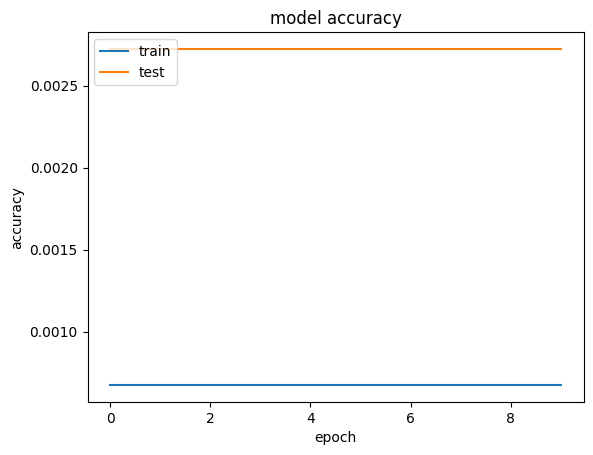

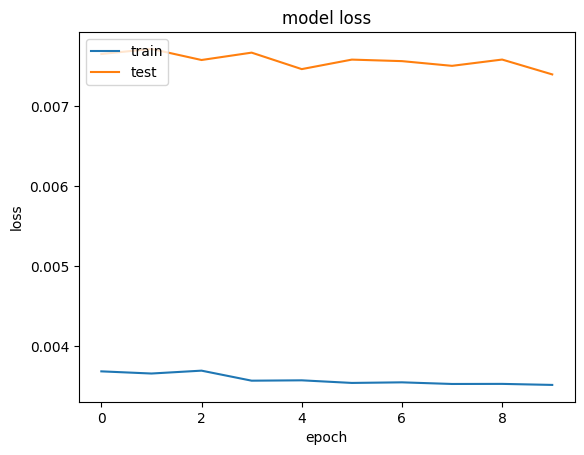

In [ ]:
compute('CO')

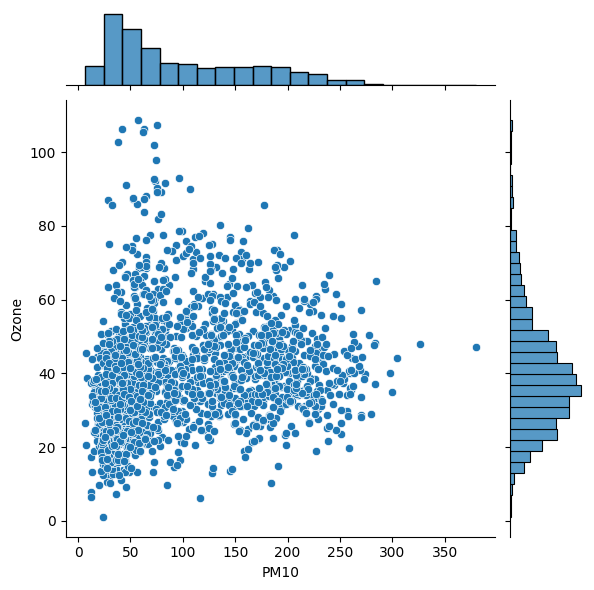

In [ ]:
sns.jointplot(x=df['PM10'], y=df['Ozone'], data = df)

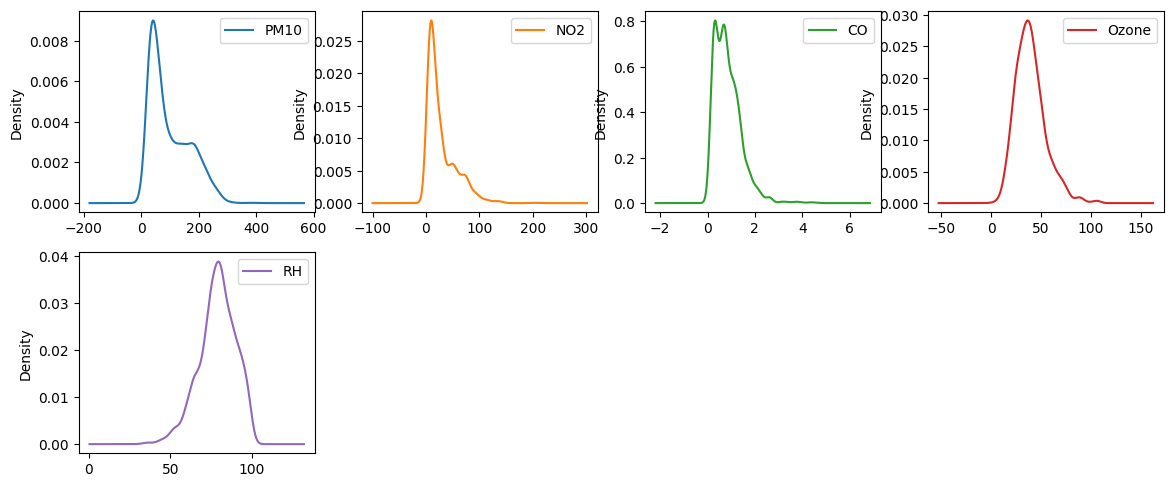

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(14,12))
plt.show()

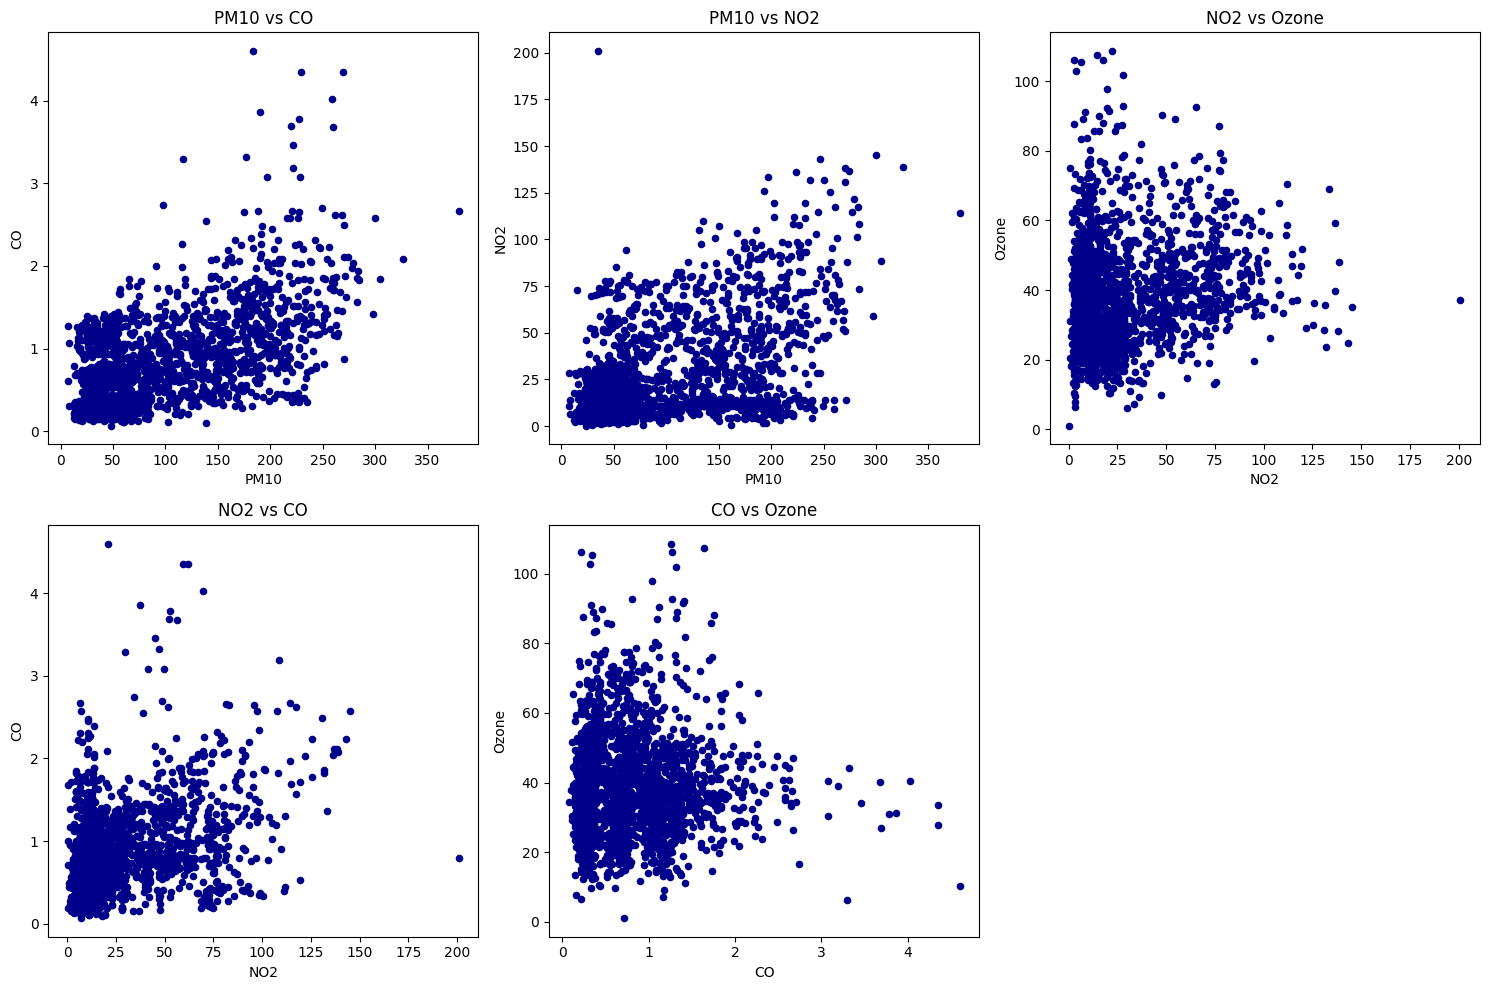

In [ ]:

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the scatter plots
df.plot.scatter(x='PM10', y='CO', c='DarkBlue', ax=axs[0, 0])
axs[0, 0].set_title('PM10 vs CO')

df.plot.scatter(x='PM10', y='NO2', c='DarkBlue', ax=axs[0, 1])
axs[0, 1].set_title('PM10 vs NO2')

df.plot.scatter(x='NO2', y='Ozone', c='DarkBlue', ax=axs[0, 2])
axs[0, 2].set_title('NO2 vs Ozone')

df.plot.scatter(x='NO2', y='CO', c='DarkBlue', ax=axs[1, 0])
axs[1, 0].set_title('NO2 vs CO')

df.plot.scatter(x='CO', y='Ozone', c='DarkBlue', ax=axs[1, 1])
axs[1, 1].set_title('CO vs Ozone')

# Remove the last subplot as it's not needed
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


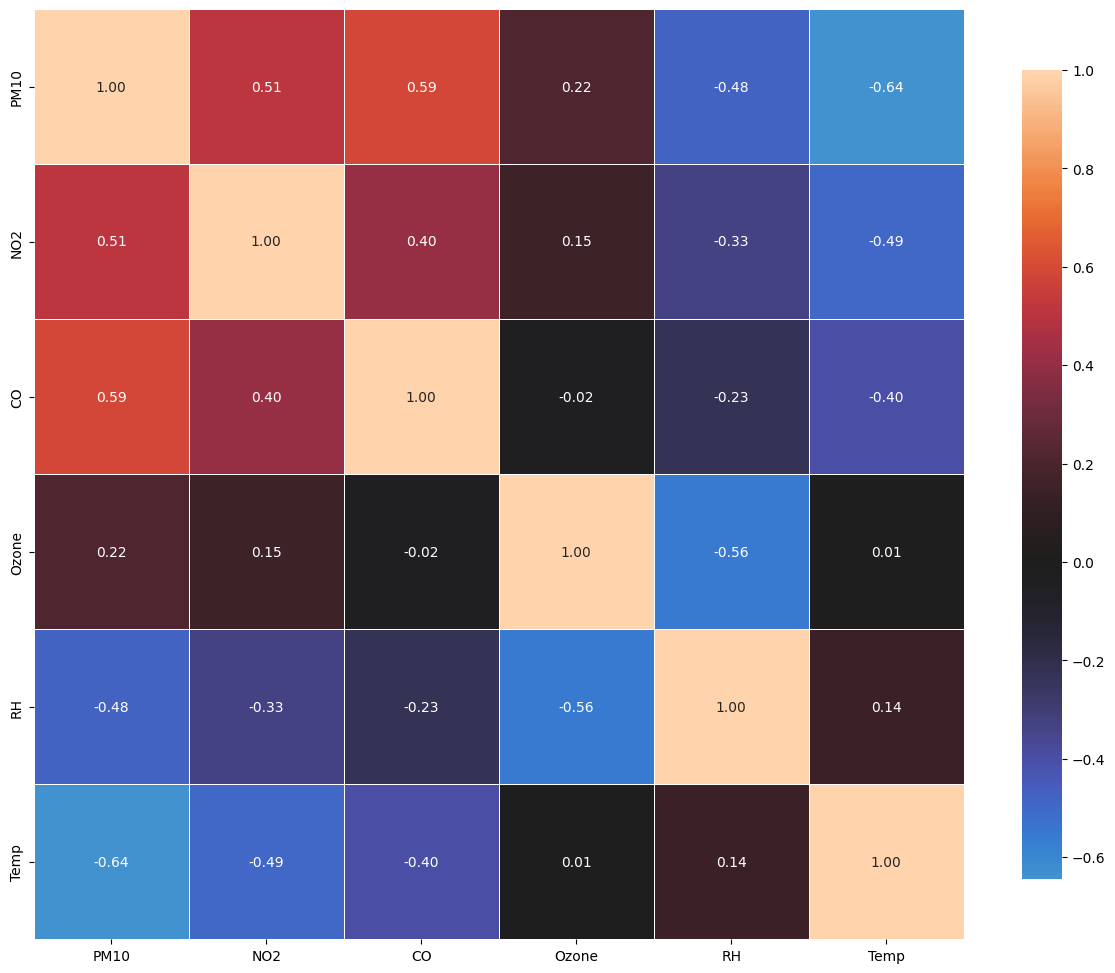

In [ ]:
# Convert non-numeric columns to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values
df_numeric = df_numeric.dropna(axis=1)

# Calculate correlations
correlations = df_numeric.corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show()

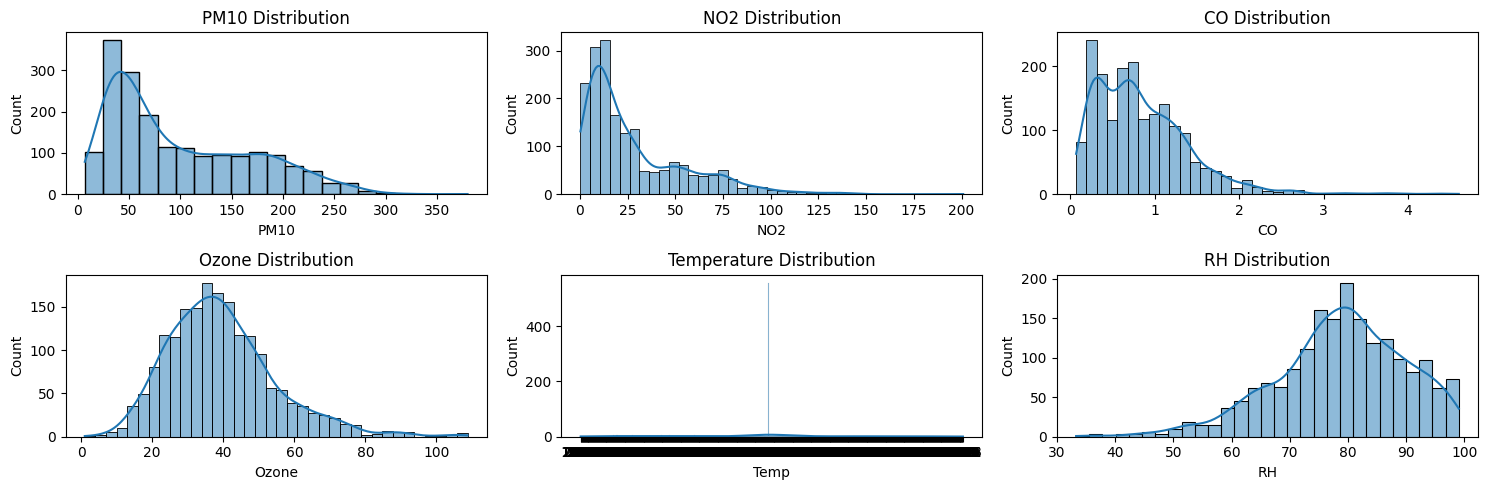

In [ ]:
# Plot histograms for visual inspection
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
sns.histplot(df['PM10'], kde=True)
plt.title('PM10 Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['NO2'], kde=True)
plt.title('NO2 Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['CO'], kde=True)
plt.title('CO Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['Ozone'], kde=True)
plt.title('Ozone Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['Temp'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['RH'], kde=True)
plt.title('RH Distribution')

plt.tight_layout()
plt.show()

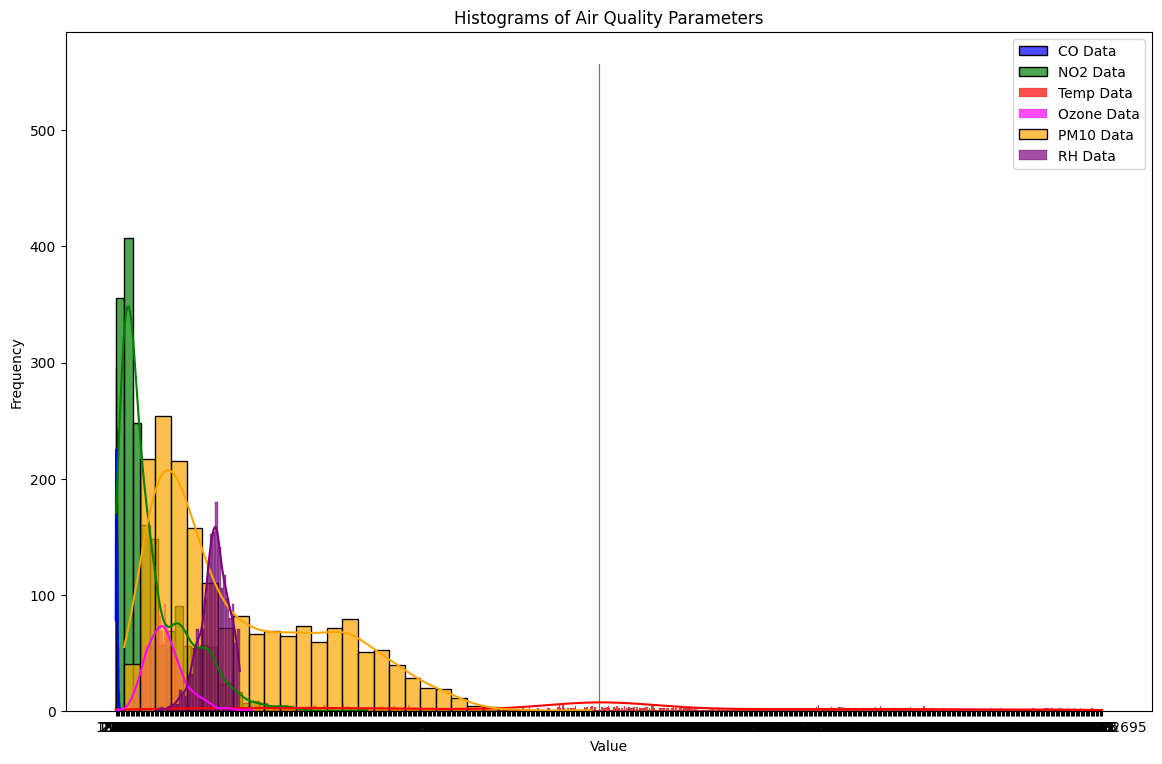

In [ ]:
plt.figure(figsize=(12, 8))

# Plot histograms for each air quality parameter
sns.histplot(df['CO'], bins=30, kde=True, color='blue', alpha=0.7, label='CO Data')
sns.histplot(df['NO2'], bins=30, kde=True, color='green', alpha=0.7, label='NO2 Data')
sns.histplot(df['Temp'], bins=30, kde=True, color='red', alpha=0.7, label='Temp Data')
sns.histplot(df['Ozone'], bins=80, kde=True, color='magenta', alpha=0.7, label='Ozone Data')
sns.histplot(df['PM10'], bins=30, kde=True, color='orange', alpha=0.7, label='PM10 Data')
sns.histplot(df['RH'], bins=30, kde=True, color='purple', alpha=0.7, label='RH Data')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Air Quality Parameters')
plt.tight_layout(pad=2.0)
plt.show()